In [13]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
cf_name = "IDM"
param_names = ["s0", "v0", "T", "omega", "d", "delta"]
df_param_merge = pd.read_pickle(r"E:\PyProject\car-following-model-test\tests\data\df_param_hysteresis_merge_module" + f"_{cf_name}.pkl")
df_param_merge

,s0,v0,T,omega,d,delta,Pair_ID,ObjV,dec_vs,acc_vs,...,acc_omega_percent,kv,ks_2,kz_2,ksz,kv_percent,ks_2_percent,kz_2_percent,ksz_percent,omega_percent
0,10.000000,40.000000,0.436868,0.548210,10.000000,10.0,10,0.863981,4.069852,8.306854,...,0.438968,2.116326e-05,0.676155,0.030567,0.230968,2.256906e-05,0.721069,0.032597,0.246311,0.584626
1,7.737167,24.353724,0.476107,1.981402,2.087164,4.0,12,0.576711,-3.831633,0.966069,...,0.471488,3.026104e-01,1.288345,0.207202,0.722405,1.200567e-01,0.511134,0.082205,0.286605,0.786095
2,10.000000,40.000000,1.109293,0.605000,0.407477,10.0,14,1.388066,10.296498,-0.832213,...,0.188327,6.031136e-06,1.481794,0.476690,1.217965,1.898701e-06,0.466493,0.150070,0.383435,0.190464
3,6.811732,17.958565,0.733120,2.752649,10.000000,7.0,15,0.543265,1.627360,1.074134,...,0.490630,2.367264e-01,2.661881,0.010796,0.256881,7.476470e-02,0.840695,0.003410,0.081130,0.869362
4,0.100000,17.043753,0.805630,1.015823,9.997592,6.0,17,0.668795,2.629436,2.638064,...,0.477148,2.084758e-01,0.998192,0.075853,0.404689,1.235625e-01,0.591623,0.044958,0.239857,0.602073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,5.767894,10.000000,0.379805,1.382309,9.999943,2.0,6569,0.641105,1.742577,7.768757,...,0.500357,2.372415e-01,1.306114,0.007724,0.127788,1.413104e-01,0.777973,0.004601,0.076116,0.823358
686,10.000000,40.000000,0.525731,0.771206,10.000000,10.0,6597,1.838980,3.107848,8.960103,...,0.604190,1.460700e-07,1.066411,0.006558,0.083893,1.262639e-07,0.921813,0.005669,0.072518,0.666636
687,5.596684,10.007324,0.590291,1.280191,3.240674,4.0,6599,0.277605,0.958386,3.489490,...,0.546775,3.930129e-02,1.220303,0.032152,0.286056,2.490874e-02,0.773415,0.020377,0.181299,0.811371
688,2.435371,25.120707,2.259007,1.832077,0.513617,2.0,6603,0.952197,-1.609772,-0.536856,...,0.437623,1.118039e-01,1.651206,0.082544,0.479316,4.809040e-02,0.710236,0.035505,0.206169,0.788034


# 参数与迟滞类型的VIM

In [18]:
data = df_param_merge[param_names]
data

,s0,v0,T,omega,d,delta
0,10.000000,40.000000,0.436868,0.548210,10.000000,10.0
1,7.737167,24.353724,0.476107,1.981402,2.087164,4.0
2,10.000000,40.000000,1.109293,0.605000,0.407477,10.0
3,6.811732,17.958565,0.733120,2.752649,10.000000,7.0
4,0.100000,17.043753,0.805630,1.015823,9.997592,6.0
...,...,...,...,...,...,...
685,5.767894,10.000000,0.379805,1.382309,9.999943,2.0
686,10.000000,40.000000,0.525731,0.771206,10.000000,10.0
687,5.596684,10.007324,0.590291,1.280191,3.240674,4.0
688,2.435371,25.120707,2.259007,1.832077,0.513617,2.0


In [19]:
def update_vs_type_label(type__):
    target = np.zeros(len(df_param_merge), dtype=int)
    
    if type__ == "dec":
        target[np.where((df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] < 0))[0]] = 0
        target[np.where((df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] > 0))[0]] = 0
        target[np.where((df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] < 0))[0]] = 1
        target[np.where((df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] > 0))[0]] = 1
    elif type__ == "acc":
        target[np.where((df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] < 0))[0]] = 0
        target[np.where((df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] > 0))[0]] = 1
        target[np.where((df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] < 0))[0]] = 0
        target[np.where((df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] > 0))[0]] = 1
    elif type__ == "full":
        target[np.where((df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] < 0))[0]] = 0
        target[np.where((df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] > 0))[0]] = 1
        target[np.where((df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] < 0))[0]] = 2
        target[np.where((df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] > 0))[0]] = 3

    # print(f"({type_})target:", np.unique(target, return_counts=True))
    return target

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

def train(n, x_train, y_train, random_state=0):
    rfc: RandomForestClassifier = RandomForestClassifier(n_estimators=n, random_state=random_state)
    rfc.fit(x_train, y_train)
    return rfc

def test(rfc, x_test, y_test):
    return rfc.score(x_test, y_test)

In [ ]:
type_ = "full"
target = update_vs_type_label(type_)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, target, test_size=0.3)
result = joblib.Parallel(n_jobs=-1)(
    joblib.delayed(train)(20, Xtrain, Ytrain, np.random.randint(0, 9999)) for _ in range(100))
score = [test(rfc, Xtest, Ytest) for rfc in result]
feature_importance = np.array([rfc.feature_importances_ for rfc in result])
print("mean score:", np.mean(score))
mean_importance = feature_importance.mean(axis=0)
pd.options.display.precision = 3
pd.DataFrame([*zip(param_names, mean_importance)]).T

# 模块与迟滞类型的VIM

In [21]:
abs_per = "_percent"  # _percent
type_ = "full"

if type_ == "dec":
    params = [f"dec_omega{abs_per}", f"dec_kv{abs_per}", f"dec_ks_2{abs_per}", f"dec_kz_2{abs_per}", f"dec_ksz{abs_per}"]
elif type_ == "acc":
    params = [f"acc_omega{abs_per}", f"acc_kv{abs_per}", f"acc_ks_2{abs_per}", f"acc_kz_2{abs_per}", f"acc_ksz{abs_per}"]
elif type_ == "full":
    params = [f"omega{abs_per}", f"kv{abs_per}", f"ks_2{abs_per}", f"kz_2{abs_per}", f"ksz{abs_per}"]
else:
    raise ValueError("type_ must be in ['dec', 'acc', 'full']")

data = df_param_merge[params].values
data

array([[5.84626092e-01, 2.25690623e-05, 7.21069203e-01, 3.25974779e-02,
        2.46310750e-01],
       [7.86095241e-01, 1.20056730e-01, 5.11133954e-01, 8.22045305e-02,
        2.86604785e-01],
       [1.90464035e-01, 1.89870071e-06, 4.66492950e-01, 1.50069860e-01,
        3.83435292e-01],
       ...,
       [8.11371385e-01, 2.49087436e-02, 7.73414983e-01, 2.03772931e-02,
        1.81298981e-01],
       [7.88034094e-01, 4.80904027e-02, 7.10235897e-01, 3.55049446e-02,
        2.06168756e-01],
       [7.16882199e-01, 1.90489870e-02, 7.81701301e-01, 3.37284414e-02,
        1.65521270e-01]])

In [24]:
target = update_vs_type_label("acc")  

Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, target, test_size=0.3)

result = joblib.Parallel(n_jobs=-1)(
    joblib.delayed(train)(20, Xtrain, Ytrain, np.random.randint(0, 9999)) for _ in range(100))
score = [test(rfc, Xtest, Ytest) for rfc in result]
feature_importance = np.array([rfc.feature_importances_ for rfc in result])
print("mean score:", np.mean(score))
mean_importance = feature_importance.mean(axis=0)
pd.options.display.precision = 3
pd.DataFrame([*zip(params, mean_importance)]).T

mean score: 0.9098550724637682


,0,1,2,3,4
0,omega_percent,kv_percent,ks_2_percent,kz_2_percent,ksz_percent
1,0.232,0.177,0.183,0.187,0.221


## 不同迟滞类型的模块贡献箱线图

C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_7896\1852054367.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_neg_acc_neg["hys_type"] = "dec_neg_acc_neg"
C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_7896\1852054367.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_neg_acc_pos["hys_type"] = "dec_neg_acc_pos"
C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_7896\1852054367.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

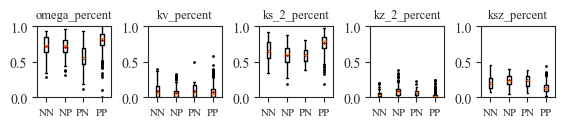

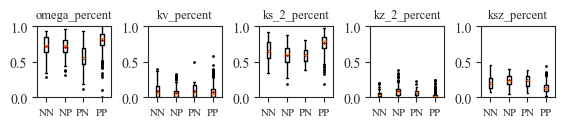

In [58]:
dec_neg_acc_neg = df_param_merge[(df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] < 0)]
dec_neg_acc_pos = df_param_merge[(df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] > 0)]
dec_pos_acc_neg = df_param_merge[(df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] < 0)]
dec_pos_acc_pos = df_param_merge[(df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] > 0)]

dec_neg_acc_neg["hys_type"] = "dec_neg_acc_neg"
dec_neg_acc_pos["hys_type"] = "dec_neg_acc_pos"
dec_pos_acc_neg["hys_type"] = "dec_pos_acc_neg"
dec_pos_acc_pos["hys_type"] = "dec_pos_acc_pos"
df_param_merge["hys_type"] = None
df_param_merge.loc[dec_neg_acc_neg.index, "hys_type"] = "dec_neg_acc_neg"
df_param_merge.loc[dec_neg_acc_pos.index, "hys_type"] = "dec_neg_acc_pos"
df_param_merge.loc[dec_pos_acc_neg.index, "hys_type"] = "dec_pos_acc_neg"
df_param_merge.loc[dec_pos_acc_pos.index, "hys_type"] = "dec_pos_acc_pos"

import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.rc('font', family='Times New Roman')
mm = 1 / 25.4  # mm转inch
fontsize = 10  # 7磅/pt/point
_width = 70 * 2 * mm  # 图片宽度英寸
_ratio = 3 / 14  # 图片长宽比
figsize = (_width, _width * _ratio)

names = ["omega_percent", "kv_percent", "ks_2_percent", "kz_2_percent", "ksz_percent"]

ax_num = len(names)
fig, axes = plt.subplots(1, ax_num, figsize=figsize)

for i, name in enumerate(names):
    axes[i].boxplot([dec_neg_acc_neg[name], dec_neg_acc_pos[name], dec_pos_acc_neg[name], dec_pos_acc_pos[name]],
                    showfliers=True, widths=0.2, flierprops=dict(marker='o', markersize=1, linestyle='none'))
    axes[i].scatter([1, 2, 3, 4],
                    [dec_neg_acc_neg[name].mean(), dec_neg_acc_pos[name].mean(), dec_pos_acc_neg[name].mean(),
                     dec_pos_acc_pos[name].mean()], c="r", s=1, marker="x")
    axes[i].set_title(name, fontsize=fontsize - 1)
    axes[i].set_xticklabels(["NN", "NP", "PN", "PP"], fontsize=fontsize - 2)
    axes[i].set_ylim([0, 1])

fig.subplots_adjust(wspace=0.5, bottom=0.2, top=0.8, right=0.99, left=0.05)
fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\type_structure_boxplot" + f"_{cf_name}.tif", dpi=500,
            pil_kwargs={"compression": "tiff_lzw"})
fig

In [59]:
from trasim_simplified.core.constant import CFM
from trasim_simplified.core.kinematics.cfm.CFModel_IDM import cf_IDM_acc_module, cf_IDM_equilibrium_module

dt = 0.1
cf_name = CFM.IDM
cf_func = cf_IDM_acc_module
cf_e = cf_IDM_equilibrium_module

In [60]:
from itertools import product
from trasim_simplified.util.calibrate.follow_sim import simulation
import joblib

pos = np.arange(0.1, 5.2, 0.5)
print(pos)
k_list = list(product(pos, pos, pos))
# for clb_v, clb_x, obs_lx, obs_lv, leaderL, v_id in zip(clb_v_s, clb_x_s, obs_lx_s, obs_lv_s, leaderL_s, id_s):
#     single_traj_run(cf_func, cf_e, cf_params[v_id], clb_v, clb_x, obs_lx, obs_lv, leaderL, v_id, k_list)
#     print("OK")

def run(param_df):
    clb_v_s_ = [traj_s_full[k][TI.v] for k in param_df[TI.Pair_ID]]
    clb_x_s_ = [traj_s_full[k][TI.x] for k in param_df[TI.Pair_ID]]
    obs_lx_s_ = [traj_s_full[k][Prefix.leader + TI.x] for k in param_df[TI.Pair_ID]]
    obs_lv_s_ = [traj_s_full[k][Prefix.leader + TI.v] for k in param_df[TI.Pair_ID]]
    leaderL_s_ = [traj_s_full[k][Prefix.leader + TI.v_Length].unique()[0] for k in param_df[TI.Pair_ID]]
    cf_params = {pair_id: {name: param_df[param_df[TI.Pair_ID] == pair_id][name].iloc[0] for name in get_cf_default_param(cf_name).keys()} for pair_id in param_df[TI.Pair_ID]}
    return joblib.Parallel(n_jobs=-1)(
        joblib.delayed(single_traj_run)(cf_func, cf_e, cf_params[pair_id], clb_v, clb_x, obs_lx, obs_lv, leaderL, pair_id, k_list) for clb_v, clb_x, obs_lx, obs_lv, leaderL, pair_id in zip(clb_v_s_, clb_x_s_, obs_lx_s_, obs_lv_s_, leaderL_s_, param_df[TI.Pair_ID]))

results = [run(param_df) for param_df in [dec_neg_acc_neg, dec_neg_acc_pos, dec_pos_acc_neg, dec_pos_acc_pos]]
results[0][0]

[0.1 0.6 1.1 1.6 2.1 2.6 3.1 3.6 4.1 4.6 5.1]


NameError: name 'get_cf_default_param' is not defined

In [19]:
result_df_full = pd.DataFrame()

names = ["dec_neg_acc_neg", "dec_neg_acc_pos", "dec_pos_acc_neg", "dec_pos_acc_pos"]

for i, df_param in enumerate([dec_neg_acc_neg, dec_neg_acc_pos, dec_pos_acc_neg, dec_pos_acc_pos]):
    result = results[i]
    pair_id = df_param[TI.Pair_ID]
    
    
    column_names = result[0][1]
    result_df = pd.DataFrame(columns=column_names)
    
    for j, pair_id in enumerate(pair_id):
        temp_df = pd.DataFrame(np.array(result[j][0]), columns=column_names)
        temp_df[TI.Pair_ID] = pair_id
        result_df = pd.concat([result_df, temp_df], axis=0)
    
    result_df["hys_type"] = names[i]
    
    result_df_full = pd.concat([result_df_full, result_df], axis=0)

result_df_full

C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_18368\3282970536.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, temp_df], axis=0)
C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_18368\3282970536.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, temp_df], axis=0)
C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_18368\3282970536.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is d

,k_speed,k_space,k_zero,dec_vs,acc_vs,total_vs,dec_ts,acc_ts,total_ts,dec_avg_acc,acc_avg_acc,dec_avg_speed,acc_avg_speed,min_speed,max_speed,dv,dec_step,acc_step,Pair_ID,hys_type
0,0.1,0.1,0.1,3.918316,18.079175,21.997491,0.891123,18.084833,7.715829,0.738432,0.889607,5.665250,6.477598,0.979142,12.277149,11.298006,153.0,127.0,1.0,dec_neg_acc_neg
1,0.1,0.1,0.6,3.631898,17.244562,20.876460,0.760985,16.941920,7.233875,0.719228,0.873348,5.685431,6.567071,1.272965,12.277149,11.004184,153.0,126.0,1.0,dec_neg_acc_neg
2,0.1,0.1,1.1,3.399126,16.462190,19.861317,0.718672,15.933591,6.742019,0.698408,0.860438,5.748940,6.644516,1.521669,12.277149,10.755480,154.0,125.0,1.0,dec_neg_acc_neg
3,0.1,0.1,1.6,3.261768,15.755146,19.016914,0.695253,15.155457,6.374848,0.688993,0.855684,5.764105,6.695810,1.666663,12.277149,10.610486,154.0,124.0,1.0,dec_neg_acc_neg
4,0.1,0.1,2.1,2.937942,15.119622,18.057564,0.631602,14.567275,6.093081,0.680766,0.857876,5.822319,6.723713,1.725268,12.277149,10.551880,155.0,123.0,1.0,dec_neg_acc_neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,5.1,5.1,3.1,-6.621346,-4.573087,-11.194432,0.213192,-2.704295,-1.325180,0.307372,0.381210,4.753050,4.389191,1.265481,8.089135,6.823654,222.0,179.0,642.0,dec_pos_acc_pos
1327,5.1,5.1,3.6,-6.879471,-4.746962,-11.626433,0.345101,-3.042365,-1.545383,0.303954,0.379088,4.739051,4.412901,1.289226,8.036994,6.747768,222.0,178.0,642.0,dec_pos_acc_pos
1328,5.1,5.1,4.1,-6.968105,-5.166581,-12.134686,0.512850,-3.302312,-1.746381,0.301283,0.380027,4.725357,4.413924,1.309069,7.997548,6.688479,222.0,176.0,642.0,dec_pos_acc_pos
1329,5.1,5.1,4.6,-5.456423,-5.555867,-11.012290,0.717514,-3.562875,-1.971767,0.328619,0.416877,4.711804,4.433088,0.672752,7.968102,7.295350,222.0,175.0,642.0,dec_pos_acc_pos


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000241ECD96E60> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x000002419AB8AD40> (for post_execute):


KeyboardInterrupt: 

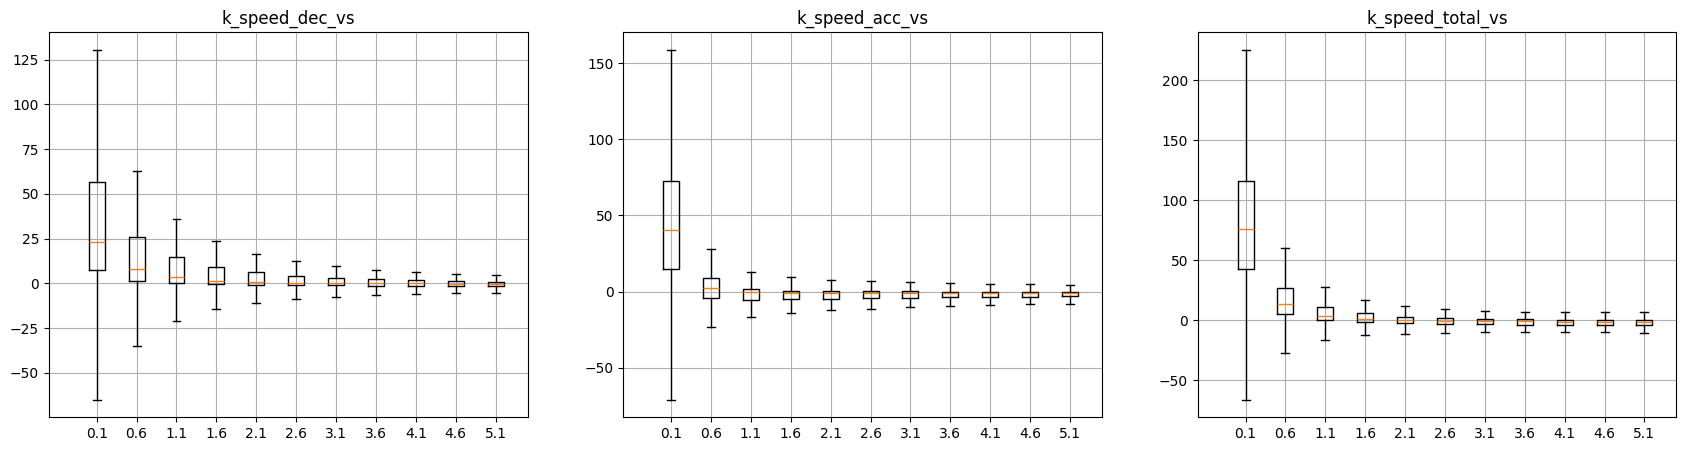

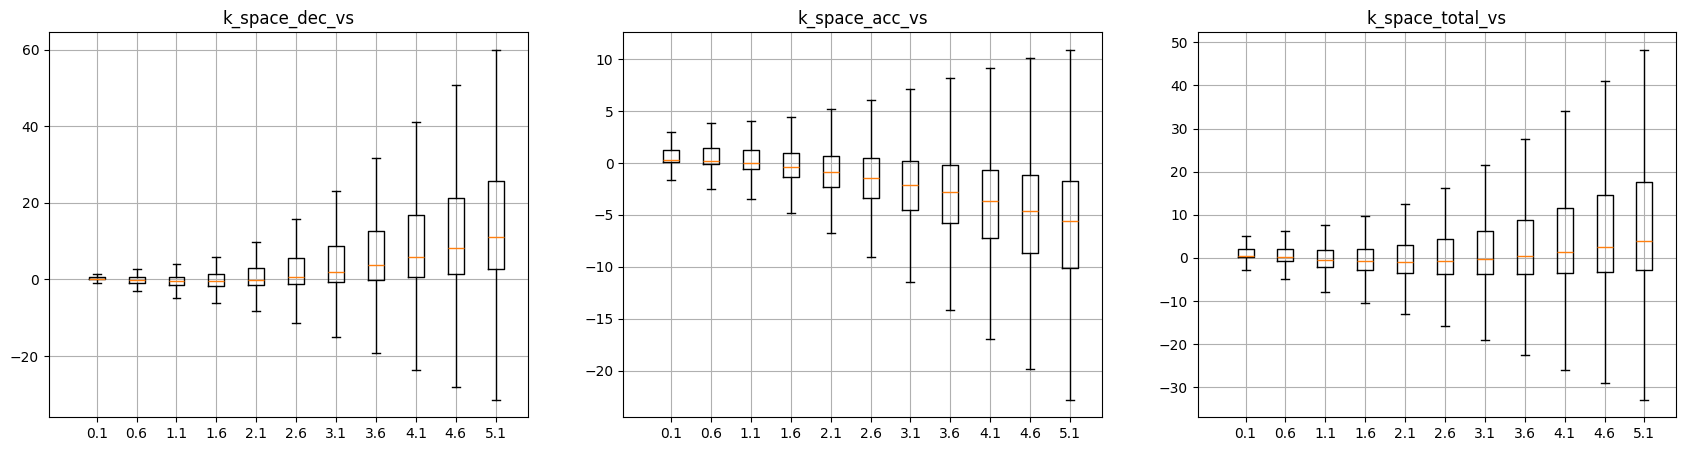

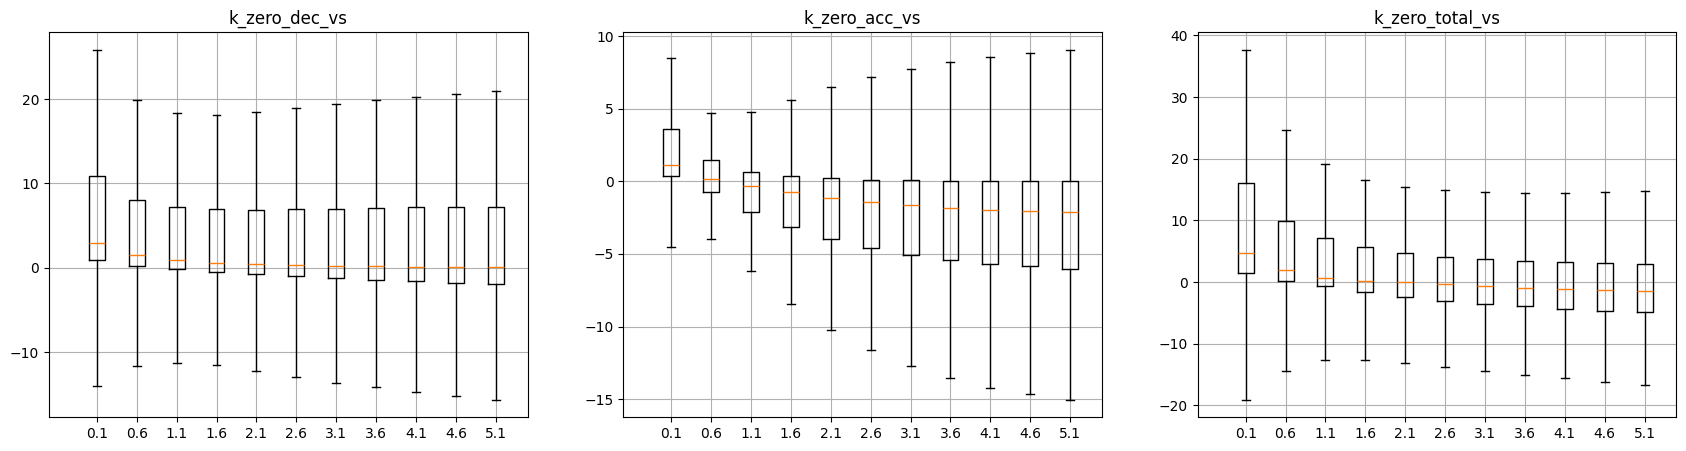

In [16]:
for hys_type in ["dec_neg_acc_neg", "dec_neg_acc_pos", "dec_pos_acc_neg", "dec_pos_acc_pos"]:
    result_df = result_df_full[result_df_full["hys_type"] == hys_type]
    result_df = result_df[(np.isfinite(result_df["dec_vs"]) & np.isfinite(result_df["acc_vs"]))]
    for k in ["k_speed", "k_space", "k_zero"]:
        temp: pd.DataFrame = result_df.groupby([k]).mean().reset_index()
        fig, axes = plt.subplots(1, 3, figsize=(21, 5))
        axes: np.ndarray[plt.Axes] = axes
        # ax.plot(temp[k], temp["dec_vs"], label="dec_vs")
        # ax.plot(temp[k], temp["acc_vs"], label="acc_vs")
        # ax.plot(temp[k], temp["total_vs"], label="total_vs")
    
        for ax_, index in zip(axes, ["dec_vs", "acc_vs", "total_vs"]):
            ax_: plt.Axes = ax_
            ax_.boxplot([result_df[result_df[k] == i][index] for i in temp[k]], positions=temp[k], showfliers=False, widths=0.2)
            # ax_.set_xscale("log")
            # ax_.set_xticks(temp[k])
            ax_.set_xticklabels([f"{t:.1f}" for t in temp[k]])
            ax_.set_xlim([-0.5, 5.5])
            ax_.grid()
            ax_.set_title(k + "_" + index)
    #     fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\module_weight_change_result_{}.png".format(k))
    # result_df.to_csv(r"E:\PyProject\car-following-model-test\tests\data\module_weight_change_result_infinite.csv", index=False)